In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.graphics.mosaicplot import mosaic

import warnings
warnings.filterwarnings('ignore')

# Measures taken

In [2]:
# govt measures - 2020 03 17
xlfile  = pd.ExcelFile("https://data.humdata.org/dataset/e1a91ae0-292d-4434-bc75-bf863d4608ba/resource/8a98c9cd-2c49-41fb-9a8e-6c76821c4d72/download/20200317-acaps-covid-19_goverment-measures-dataset.xlsx")
dfs = { sht : xlfile.parse(sht) for sht in xlfile.sheet_names}
#dfs

In [3]:
df = dfs["Database"]
print( df.shape ) 
df.head(2)

(815, 16)


,ID,COUNTRY,ISO,ADMIN_LEVEL_NAME,PCODE,REGION,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
0,1,Afghanistan,AFG,NaN,NaN,Asia,Public health measures,Health screenings in airports and border cross...,No,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
1,2,Afghanistan,AFG,Kabul,NaN,Asia,Public health measures,Introduction of quarantine policies,No,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN


In [4]:
def setClassType( mstr):
    mstr = mstr.lower() 
    if "border" in mstr  or "checkpoints"  in mstr or "arrival" in mstr or "travel" in mstr or "flights" in mstr or "visa" in mstr:
        return "Border Movements Action"
    elif "econom" in mstr or "imports" in mstr:
        return "Economic Action"
    elif "citizen" in mstr  or "surveilance" in mstr  or "lockdown" in mstr  or "state of emergency" in mstr or "awareness" in mstr or "psychological" in mstr:
        return "Internal Movement & Individual Support"
#         return "Restrict Internal Movement"
#     elif  "awareness" in mstr or "psychological" in mstr:
#         return "Empower Individual Responsibility"
    elif "policies" in mstr or "structures" in mstr  or "system"  in mstr: 
        return "Setup Policies & Structures"       
    elif "closure" in mstr or "gatherings" in mstr :
        return "Service Closure" #"Systems Setup & Service Closure"
    else:
        return "Other"
    
df[ 'MEASURE_TYPES'] = df.apply( lambda x: setClassType(x['MEASURE']), axis=1)

In [5]:
params = {
    'font.size' : 10.0,
    'figure.figsize': (15.0, 8.0),
}
plt.rcParams.update(params)
plt.style.use('fivethirtyeight') #tableau-colorblind10 ggplot

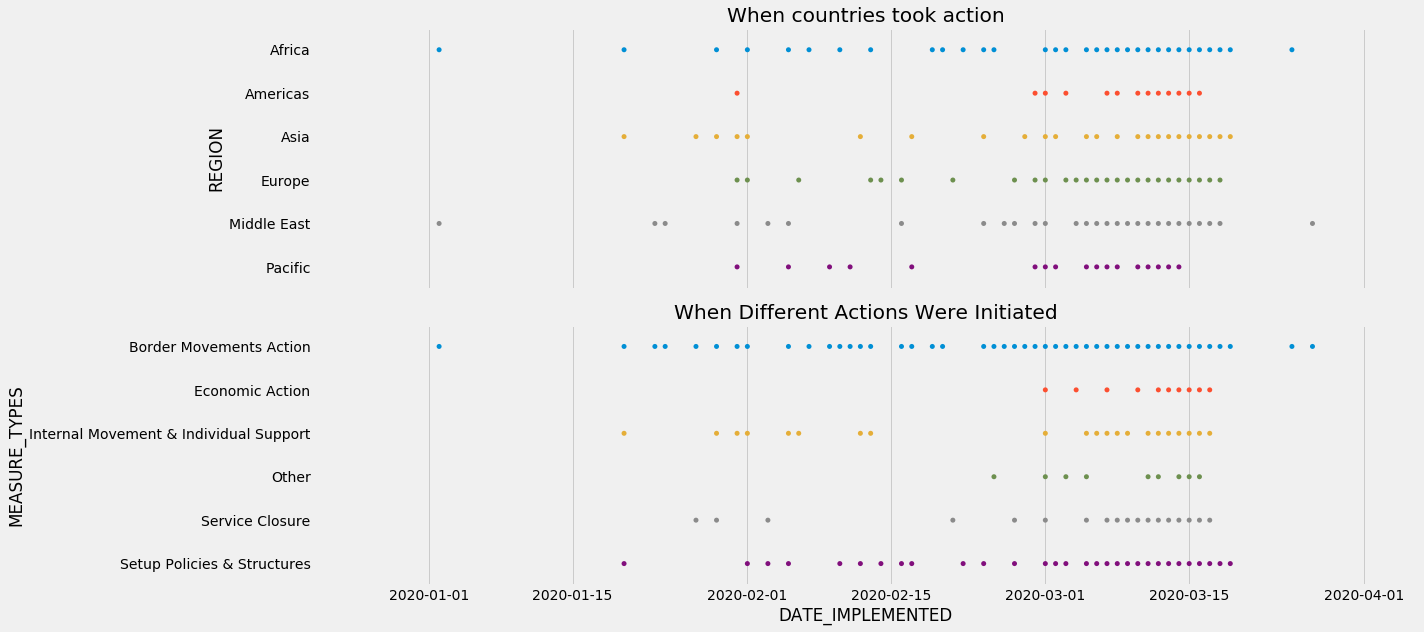

In [6]:
fig, ax = plt.subplots( nrows=2, ncols=1, figsize=(20.0, 9.0), sharex=True)
# plt.subplots_adjust(hspace=2.4)

dtmp = df.groupby( ['REGION', 'DATE_IMPLEMENTED']).size().reset_index()
sns.swarmplot(x='DATE_IMPLEMENTED', y='REGION', data=dtmp, ax=ax[0]).set_title( "When countries took action") 
ax[0].get_xaxis().set_label_text("")

dtmp = df.groupby( ['MEASURE_TYPES', 'DATE_IMPLEMENTED']).size().reset_index()
sns.swarmplot(x='DATE_IMPLEMENTED', y='MEASURE_TYPES', data=dtmp, ax=ax[1]).set_title( "When Different Actions Were Initiated")

fig.tight_layout()

Text(0.5, 1.0, 'Detailed Type of Action Taken by Target Population')

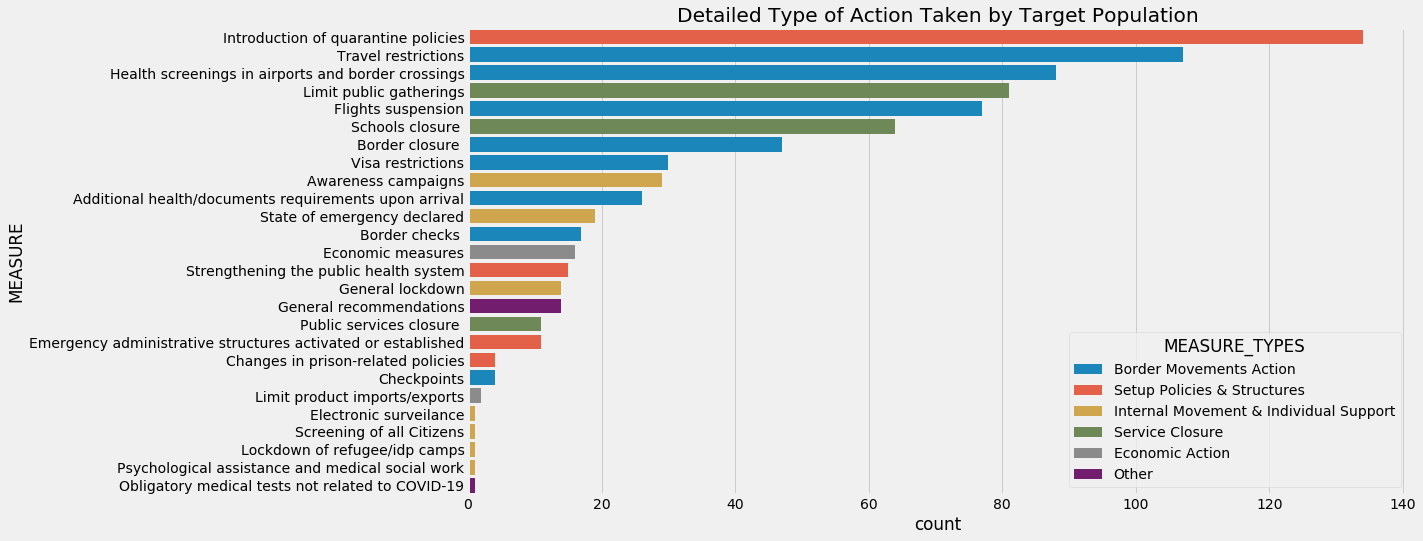

In [7]:
g = sns.countplot( y="MEASURE", hue='MEASURE_TYPES', data=df, order = df.MEASURE.value_counts().index, dodge=False ) #hue='REGION', hue="TARGETED_POP_GROUP", 
g.figsize = (15.0, 12.0)
plt.title( "Detailed Type of Action Taken by Target Population")


Text(0.5, 1.0, 'Type of Action Taken by Targeted Population')

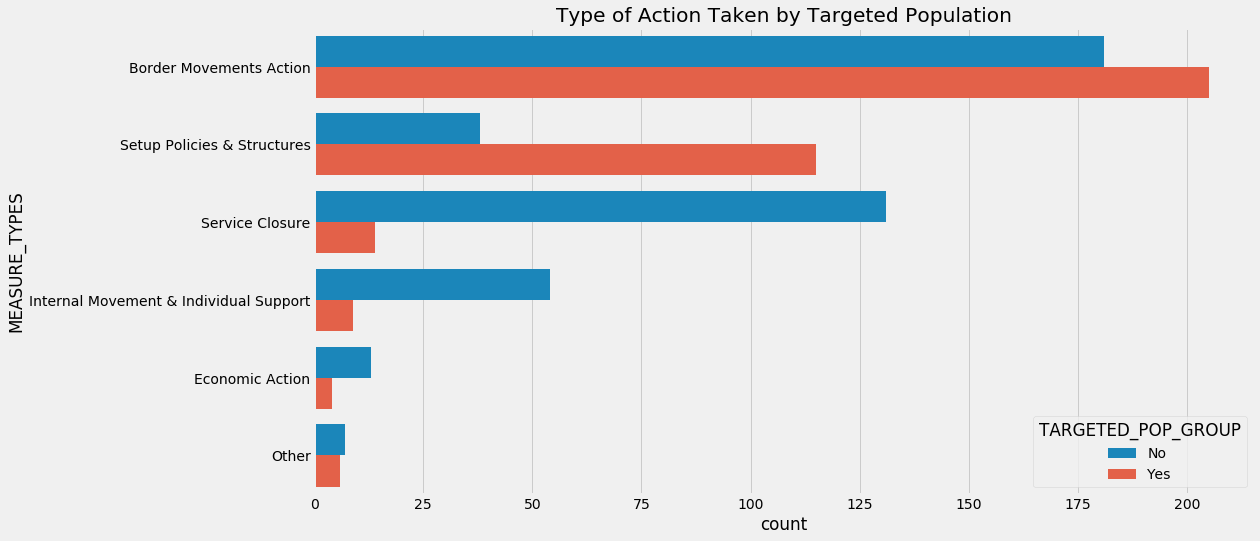

In [8]:

sns.countplot( y="MEASURE_TYPES", hue="TARGETED_POP_GROUP", data=df, order = df.MEASURE_TYPES.value_counts().index ) #hue='REGION', 
plt.title( "Type of Action Taken by Targeted Population")

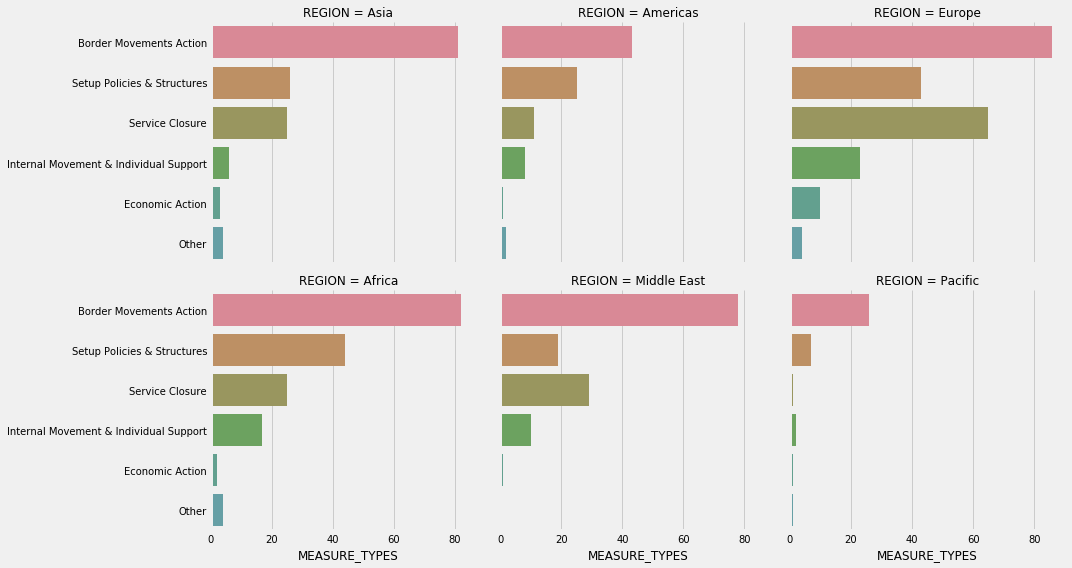

In [9]:
plt.rcParams['font.size'] = 10.0
def cplot(x, **kwargs):
    sns.countplot(y=x,  **kwargs, palette= sns.husl_palette(9, s=0.7 )) #'TARGETED_POP_GROUP',
    
g = sns.FacetGrid( col="REGION", data=df, col_wrap=3, size=4, aspect=1.25) 
fg = g.map(cplot, "MEASURE_TYPES",  order = df.MEASURE_TYPES.value_counts().index )
# g.fig.suptitle( 'Type of Action Taken by Region')

# fg.add_legend() 

In [10]:
# #df.DATE_IMPLEMENTED.value_counts().plot(kind='line')
# #df.groupby( ['ID','REGION', 'DATE_IMPLEMENTED']).size().unstack(fill_value=0)
# dtmp = df.groupby( ['REGION', 'DATE_IMPLEMENTED']).size().reset_index()
# sns.swarmplot(x='DATE_IMPLEMENTED', y='REGION', data=dtmp)

# # # dtmp
# # dtmp = dtmp.pivot(columns='REGION', index='DATE_IMPLEMENTED', values=0)
# # dtmp.plot(kind='line')
# plt.title( "Timeline - When countries took action")

In [11]:
# dtmp = df.groupby( ['MEASURE_TYPES', 'DATE_IMPLEMENTED']).size().reset_index()
# # dtmp.columns = ['MEASURE_TYPES', 'DATE_IMPLEMENTED', 'N_COUNTS']
# sns.swarmplot(x='DATE_IMPLEMENTED', y='MEASURE_TYPES', data=dtmp)
# # dtmp = dtmp.pivot(columns='MEASURE_TYPES', index='DATE_IMPLEMENTED', values=0)
# # dtmp.plot(kind='line')
# # dtmp.reset_index()
# plt.title( "Timeline - When Different Actions Were Initiated")


In [12]:
# dtmp = df.groupby( ['REGION', 'DATE_IMPLEMENTED', 'MEASURE_TYPES']).size().reset_index()
# dtmp

# g = sns.FacetGrid( col="REGION", data=dtmp, col_wrap=2, size=8, aspect=1.25)
# g.fig.suptitle('Timeline - When Different Action Types were Taken')
# fg = g.map(sns.lineplot, x='DATE_IMPLEMENTED', y=0, hue='REGION', data=dtmp)
# fg.add_legend()
# dtmp